## KDP 結晶の誘電率の周波数依存性

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.colors import Normalize

In [61]:
def plot_epsilon1(x, y, legend, targetFileIndex):
    f = plt.figure()
    ax1 = f.add_subplot(111)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] ='Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'stix'

    xmin = np.min(x)
    xmax = np.max(x)
    ax1.set_xlim(xmin, xmax)
    ax1.hlines(0,xmin,xmax, color = "black", linestyles = "solid")

    ax1.set_xlabel("Frequency (kHz)")
    ax1.set_ylabel("Dielectric function $\epsilon_1(\omega)$")

    for i in targetFileIndex:
        ax1.plot(x[i], y[i], label = f"{legend[i]} K")

    ax1.legend()
    plt.show()

In [59]:
def plot_epsilon2(x, y, legend, targetFileIndex):
    f = plt.figure()
    ax1 = f.add_subplot(111)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] ='Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'stix'

    xmin = np.min(x)
    xmax = np.max(x)
    ax1.set_xlim(xmin, xmax)

    ax1.set_yscale("log")

    ax1.set_xlabel("Frequency (kHz)")
    ax1.set_ylabel("Dielectric function $\epsilon_2(\omega)$")

    for i in targetFileIndex:
        ax1.plot(x[i], y[i],
                label = f"{legend[i]} K")

    ax1.legend()
    plt.show()

In [50]:
# 標準コンデンサの容量(F)
C0 = 0.4678   / 0.142   * 8.85*10**(-14)
#    面積(cm2)  厚さ(cm)  誘電率(F/cm)

# 130 kHz - 190 kHz まで測定した温度
Temp = np.array([130, 140, 160, 180, 210, 240, 270, 295])
nfile = Temp.size

# グラフで表示する物理量 測定点が1000個あるはずだが最初の一つが読みこないため 999 となってる
Frequency   = np.zeros((nfile, 999))
Epsilon1    = np.zeros((nfile, 999))
Epsilon2    = np.zeros((nfile, 999))
Dissipation = np.zeros((nfile, 999))

for i in range(nfile):
    df = pd.read_csv(f"2024_10_25/{Temp[i]}K.csv",
                     encoding = 'shift_jis',                          # shift_jis にしないと読み込めない
                     skiprows = 33,                                   # はじめ32行はヘッダー情報
                     usecols  = [2, 4, 5])                            # 2行目が周波数、4行目がCp、5行目がD

    Frequency[i]    = df.iloc[:,0].to_numpy() / 10**3 # kHz に換算
    Epsilon1[i]     = df.iloc[:,1].to_numpy() / C0
    Dissipation[i]  = df.iloc[:,2].to_numpy()
    Epsilon2[i]     = np.abs(Dissipation[i] * Epsilon1[i])

# 共鳴周波数を誘電率の虚部が最大となる周波数として求める
Frequency_res = np.array([])
for i in range(nfile):
    Frequency_res = np.append(Frequency_res, Frequency[i][np.argmax(Epsilon2[i])])


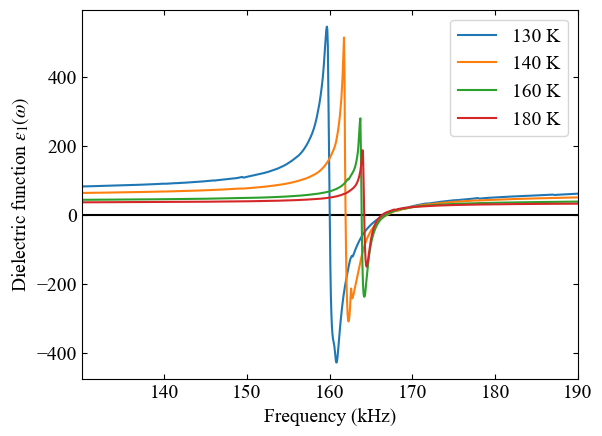

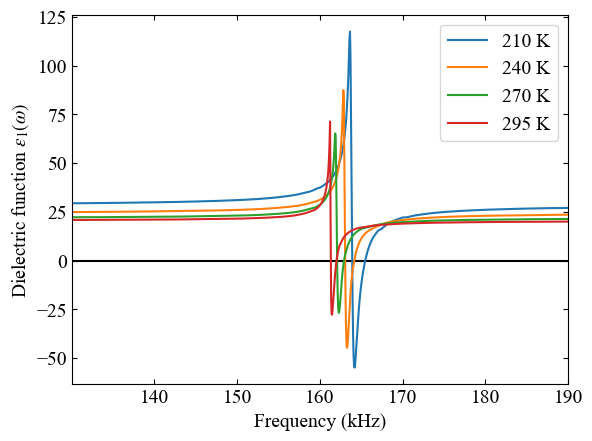

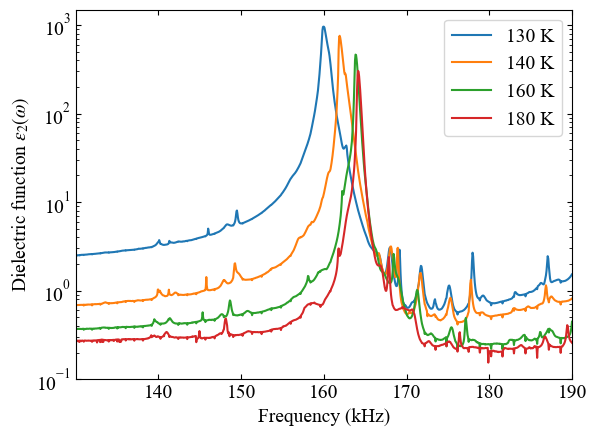

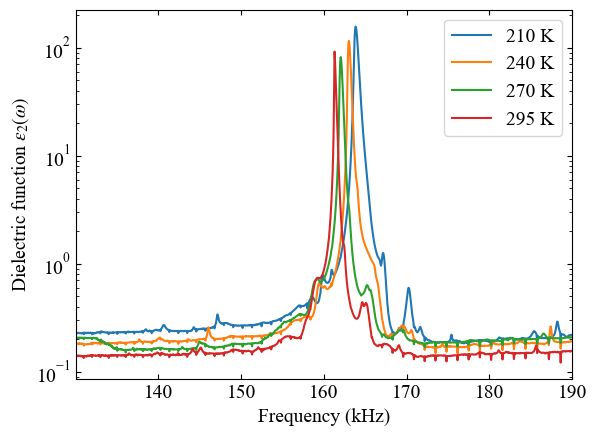

In [62]:
plot_epsilon1(Frequency, Epsilon1, Temp, [0, 1, 2, 3])
plot_epsilon1(Frequency, Epsilon1, Temp, [4, 5, 6, 7])
plot_epsilon2(Frequency, Epsilon2, Temp, [0, 1, 2, 3])
plot_epsilon2(Frequency, Epsilon2, Temp, [4, 5, 6, 7])

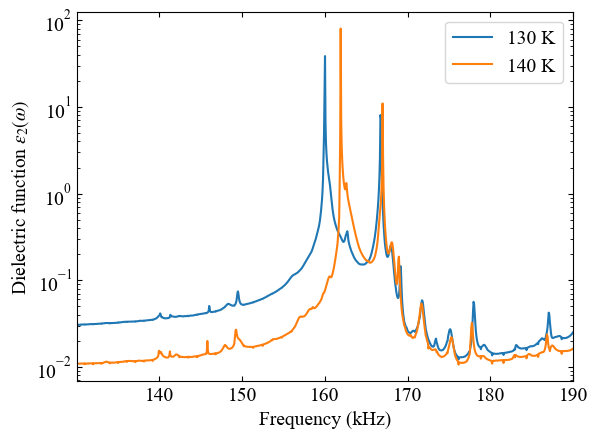

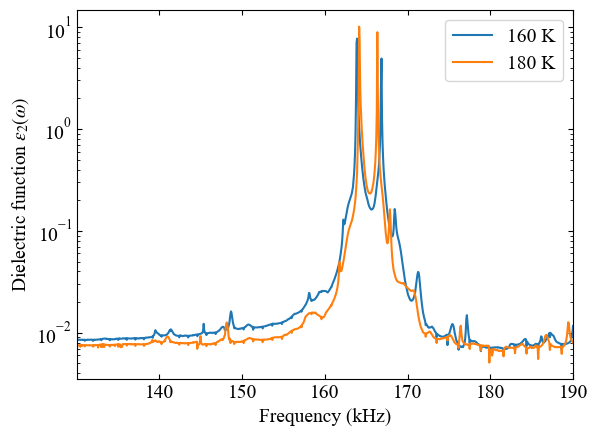

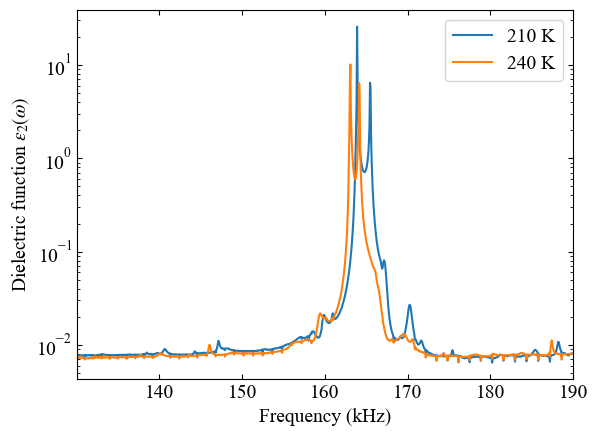

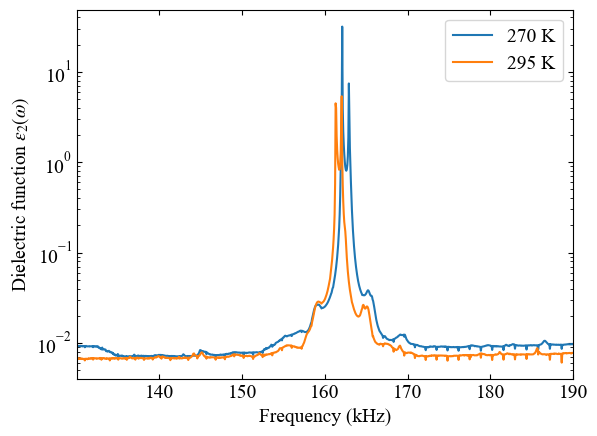

In [64]:
plot_epsilon2(Frequency, Dissipation, Temp, [0, 1])
plot_epsilon2(Frequency, Dissipation, Temp, [2, 3])
plot_epsilon2(Frequency, Dissipation, Temp, [4, 5])
plot_epsilon2(Frequency, Dissipation, Temp, [6, 7])


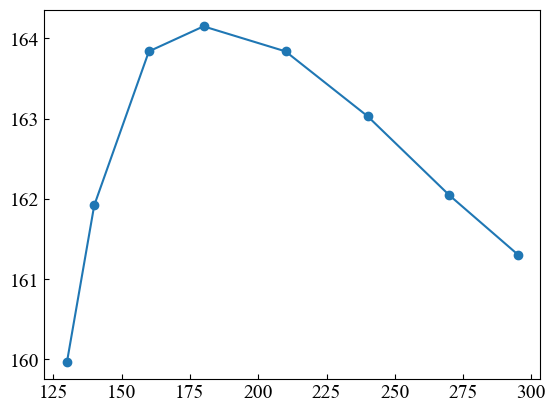

In [41]:
plt.scatter(Temp, Frequency_res)
plt.plot(Temp, Frequency_res)